In [1627]:
import numpy as np
import matplotlib.pyplot as plt

In [1628]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
display(X.shape, X)

y = np.array([45, 55, 50, 55, 60, 35, 75, 80, 50, 60])
display(y.shape, y)

(2, 10)

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

(10,)

array([45, 55, 50, 55, 60, 35, 75, 80, 50, 60])

In [1629]:
# equation of line
y_pred1 = 35 * np.ones(X.shape[1]) + X[1] * 5
y_pred2 = 40 * np.ones(X.shape[1]) + X[1] * 7.5

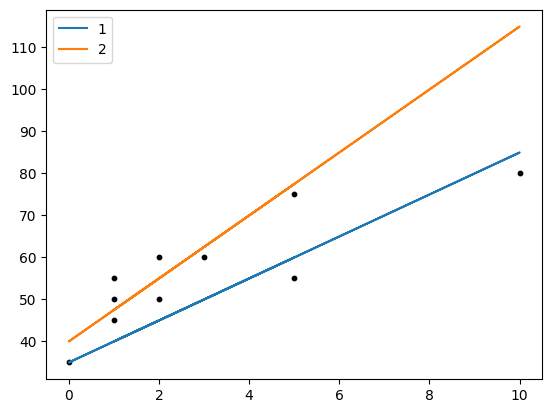

In [1630]:
plt.figure()
plt.scatter(X[1], y, c='black', s=10)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

In [1631]:
# Simple error
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)

err1, err2

(65.0, -60.0)

In [1632]:
# MAE
mae_1 = np.sum(np.abs(y - y_pred1)) / len(y)
mae_2 = np.sum(np.abs(y - y_pred2)) / len(y)

mae_1, mae_2

(8.5, 9.0)

In [1633]:
# MSE
mse_1 = np.sum((y - y_pred1)**2) / len(y)
mse_2 = np.sum((y - y_pred2)**2) / len(y)

mse_1, mse_2

(97.5, 188.75)

In [1634]:
# Least squares method
W_analytic = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W_analytic

array([45.0625,  3.8125])

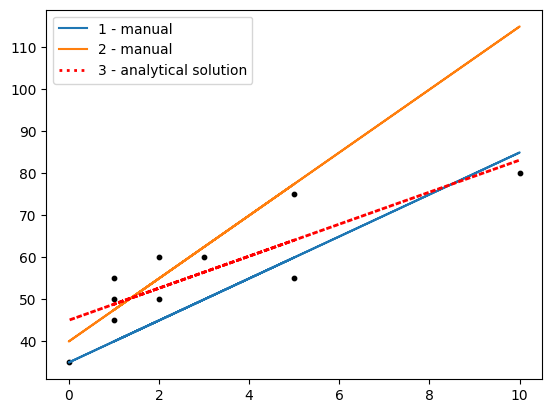

In [1635]:
y_pred3 = W_analytic[0] * X[0] + W_analytic[1] * X[1]

plt.figure()
plt.scatter(X[1], y, c='black', s=10)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, c='red', label='3 - analytical solution', linewidth=2, linestyle='dotted')
plt.legend()
plt.show()

In [1636]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = ((y - y_pred)**2).mean() # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [1637]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [1638]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [1639]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875)

In [1640]:
# Gradient descent
# MSE
Q = ((y_pred3 - y)**2).mean()
print(f'MSE: {Q}')

MSE: 43.96875


In [1641]:
# 1/n * 2 * np.sum(y_pred - y)
eta = 0.07

W = np.zeros(len(X))

# Derivative MSE (gradient)
# dQ = 2 * 1/n * np.dot(X, y_pred - y) <=> dQ = 2 * 1/len(y) * X * (X.T * W - y)

# X[0] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# y_pred - y = <error> = X.T * W - y =
# X[0] * (y_pred - y) = [-45. -55. -50. -55. -60. -35. -75. -80. -50. -60.]
# np.sum(X[0] * (y_pred - y)) = -565.0
# dW = 2 * np.sum(X[0] * (y_pred - y)) / len(y) = -113.0 => Gradient

# y_pred = X.T * W

new_W = []

for i in range(500):
    y_pred = np.dot(X.T, W)

    for k in range(len(W)):
        W[k] -=  eta * 2 * np.sum(X[k] * (y_pred - y)) / len(y)

    new_W = W
    if i % 10 == 0:
        eta = eta / 1.1
        print(f'Iter: {i+1}, MSE: {calc_mse(y, np.dot(X.T, W))}, W: {new_W}')

W_analytic, new_W

Iter: 1, MSE: 5978.1181000000015, W: [ 7.91 28.  ]
Iter: 11, MSE: 340729.8192276821, W: [ 47.80001471 144.89259895]
Iter: 21, MSE: 613647.4657461597, W: [ 65.56566473 190.14872727]
Iter: 31, MSE: 21382.040555615804, W: [43.41250621 39.53114116]
Iter: 41, MSE: 64.79306966507568, W: [40.15132747  5.4256954 ]
Iter: 51, MSE: 49.2925849248051, W: [41.70064312  4.42327222]
Iter: 61, MSE: 46.5240481027173, W: [42.7332573   4.23487234]
Iter: 71, MSE: 45.28133920502145, W: [43.39310783  4.11521853]
Iter: 81, MSE: 44.68574987877533, W: [43.82867519  4.03623511]
Iter: 91, MSE: 44.382858129813144, W: [44.12482824  3.98253232]
Iter: 101, MSE: 44.22031723270616, W: [44.33166221  3.94502616]
Iter: 111, MSE: 44.12874152186305, W: [44.47966927  3.91818737]
Iter: 121, MSE: 44.074820259991874, W: [44.58794039  3.89855407]
Iter: 131, MSE: 44.04177478935872, W: [44.66874225  3.8839019 ]
Iter: 141, MSE: 44.02077488849538, W: [44.73014705  3.87276708]
Iter: 151, MSE: 44.00698339317914, W: [44.77758496  3.864

(array([45.0625,  3.8125]), array([44.9975732 ,  3.82427348]))

In [1642]:
# Task 1. Find optimal speed of learning and number of iterations

n = X.shape[1]  # 10
W = np.array([1, 0.5])
# W = np.dot(X.T, W)

#####
eta = 65e-3  # 0.065
iters_n = 250  # 250
####

print(f'Number of objects = {n}')
print(f'printLearning rate = {eta}')
print(f'Initial weights = {W}')
print(X, W)
for i in range(iters_n):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)

    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * np.sum(X[k] * (y_pred - y)))

    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10
printLearning rate = 0.065
Initial weights = [1.  0.5]
[[ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  2  5  3  0  5 10  1  2]] [1.  0.5]
Iteration #0: W_new = [ 8.02  25.005], MSE = 3047.75
Iteration #10: W_new = [27.47455685 36.39014686], MSE = 13048.9
Iteration #20: W_new = [32.81632485 14.68447839], MSE = 1766.18
Iteration #30: W_new = [36.38650034  5.68173719], MSE = 86.19
Iteration #40: W_new = [39.28948911  4.86020901], MSE = 61.02
Iteration #50: W_new = [41.0947635   4.53198797], MSE = 51.96
Iteration #60: W_new = [42.23935407  4.32443399], MSE = 47.99
Iteration #70: W_new = [42.9896357   4.18838198], MSE = 46.12
Iteration #80: W_new = [43.49655063  4.09646077], MSE = 45.19
Iteration #90: W_new = [43.84855534  4.03263015], MSE = 44.7
Iteration #100: W_new = [44.09913728  3.98719098], MSE = 44.43
Iteration #110: W_new = [44.28158203  3.95410743], MSE = 44.27
Iteration #120: W_new = [44.41715782  3.92952285], MSE = 44.17
Iteration #130: W_new = [44.51978859  3.91

In [1643]:
# Task 2. Fix the error.
n = X.shape[1]  # 10
W = np.array([1, 0.5])

#####
eta = 65e-3  # 0.065
iters_n = 250  # 250
####

print(f'Number of objects = {n}')
print(f'printLearning rate = {eta}')
print(f'Initial weights = {W}')

for i in range(iters_n):
    y_pred = np.dot(W, X)

    # for k in range(W.shape[0]):
    #     W[k] -= eta * (1/n * 2 * np.sum(X[k] * (y_pred - y)))

    # W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y))) # error np.sum

    ####
    # derivative of MSE
    dW = (1/n * 2 * np.dot(X, (y_pred - y))) #2 * np.sum(X[0] * W[0] - y) / len(y)
    W -= eta * dW
    #####

    err = calc_mse(y, y_pred)
    W_pred = W

    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W_pred}, MSE = {round(err,2)}')

Number of objects = 10
printLearning rate = 0.065
Initial weights = [1.  0.5]
Iteration #0: W_new = [ 8.02  25.005], MSE = 3047.75
Iteration #10: W_new = [27.47455685 36.39014686], MSE = 13048.9
Iteration #20: W_new = [32.81632485 14.68447839], MSE = 1766.18
Iteration #30: W_new = [36.38650034  5.68173719], MSE = 86.19
Iteration #40: W_new = [39.28948911  4.86020901], MSE = 61.02
Iteration #50: W_new = [41.0947635   4.53198797], MSE = 51.96
Iteration #60: W_new = [42.23935407  4.32443399], MSE = 47.99
Iteration #70: W_new = [42.9896357   4.18838198], MSE = 46.12
Iteration #80: W_new = [43.49655063  4.09646077], MSE = 45.19
Iteration #90: W_new = [43.84855534  4.03263015], MSE = 44.7
Iteration #100: W_new = [44.09913728  3.98719098], MSE = 44.43
Iteration #110: W_new = [44.28158203  3.95410743], MSE = 44.27
Iteration #120: W_new = [44.41715782  3.92952285], MSE = 44.17
Iteration #130: W_new = [44.51978859  3.91091235], MSE = 44.11
Iteration #140: W_new = [44.59879665  3.89658545], MSE =

In [1644]:
print(np.sum(X, axis=1))

[10 30]


In [1645]:
# Task 3. Threshold of stop
n = X.shape[1]  # 10
W = np.array([1, 0.5])
eta = 65e-3  # 0.065

iter_n = 0
iters_max = 500

min_weight_dist = 1e-3
weight_dist = np.inf

W_pred = [0, 0]

print(f'Number of objects = {n}')
print(f'printLearning rate = {eta}')
print(f'Initial weights = {W}')

while weight_dist > min_weight_dist and iter_n < iters_max:
    y_pred = np.dot(W, X)

    dW = (1/n * 2 * np.dot(X, (y_pred - y)))
    W_new = W - eta * dW

    err = calc_mse(y, y_pred)

    weight_dist = np.linalg.norm(W_new - W, ord=2)

    iter_n += 1

    W = W_new

    if iter_n % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{iter_n}: W_new = {W_pred}, MSE = {round(err,2)}')

Number of objects = 10
printLearning rate = 0.065
Initial weights = [1.  0.5]
Iteration #10: W_new = [0, 0], MSE = 186791.83
Iteration #20: W_new = [0, 0], MSE = 1094337.21
Iteration #30: W_new = [0, 0], MSE = 139597.93
Iteration #40: W_new = [0, 0], MSE = 308.21
Iteration #50: W_new = [0, 0], MSE = 49.65
Iteration #60: W_new = [0, 0], MSE = 46.63
Iteration #70: W_new = [0, 0], MSE = 45.31
Iteration #80: W_new = [0, 0], MSE = 44.69
Iteration #90: W_new = [0, 0], MSE = 44.38
Iteration #100: W_new = [0, 0], MSE = 44.21
Iteration #110: W_new = [0, 0], MSE = 44.12
Iteration #120: W_new = [0, 0], MSE = 44.07
Iteration #130: W_new = [0, 0], MSE = 44.04
Iteration #140: W_new = [0, 0], MSE = 44.02
Iteration #150: W_new = [0, 0], MSE = 44.0
Iteration #160: W_new = [0, 0], MSE = 43.99
Iteration #170: W_new = [0, 0], MSE = 43.99
Iteration #180: W_new = [0, 0], MSE = 43.98
Iteration #190: W_new = [0, 0], MSE = 43.98
Iteration #200: W_new = [0, 0], MSE = 43.98
Iteration #210: W_new = [0, 0], MSE = 